## Opis projektu

Przedmiotem projektu jest ewolucja sztucznej inteligencji kierującej pojazdami w prostym środowisku 2D. W moim algorytmie za podejmowanie decyzji odpowiada prosta sieć neuronowa, która na wejściu przyjmuje jeden parametr opisujący aktualną prędkość pojazdu oraz 7 parametrów opisujących odległości od frontu pojazdu do ściany patrząc w określonym kierunku.

## Struktura kodu

Kod jest podzielony na następujące foldery:
* `simulate` - pliki związane ze środowiskiem symulacyjnym
* `visualise` - wizualizacja ruchu pojazdów
* `ai` - kod sieci neuronowych oraz określenie problemów dla algorytmu ewolucyjnego
* `experiments` - kod źródłowy programów uruchamiających uczenie oraz wizualizację wyników

Oprócz tego ważny jest jeszcze katalog `maps`, w którym znajdują się mapy używane do uczenia i testów.

Przykładowa mapa:

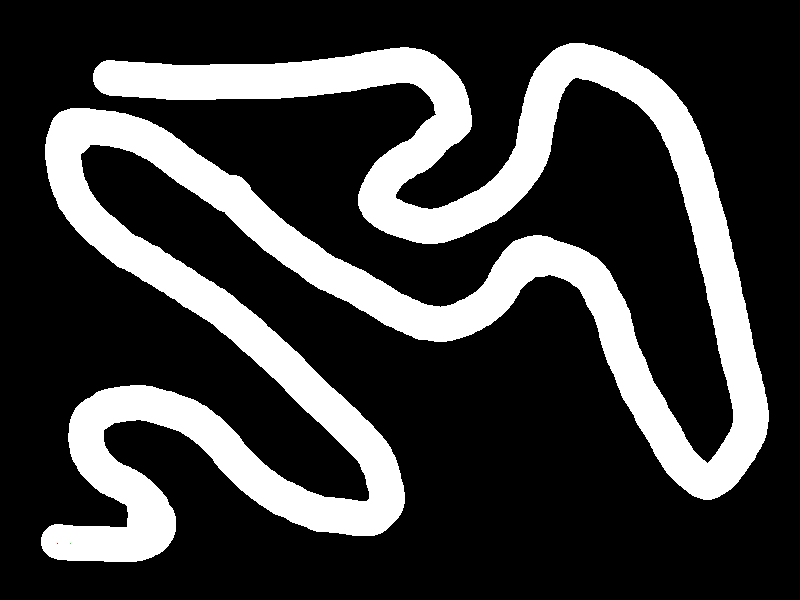

In [1]:
from IPython.display import Image
Image('maps/trasa1.png')

## Algorytm:

* Tworzona jest gęsta sieć neuronowa złożona z warstwy wejściowej, wyjściowej i 0 lub 1 wewnętrznej warstwy. Funkcja aktywacji to `tanh`
* Każdy osobnik populacji reprezentuje wagi sieci neuronowej, inicjalizowany jest losowymi wartościami z rozkładu normalnego
* Populacja ewoluuje według algorytmu NSGA-II - implementacja z biblioteki [PAGMO](https://esa.github.io/pagmo2). Kryteria brane pod uwagę to przejechana odległość (dokładnie, długość najkrótszej ścieżki na trasie pomiędzy punktem startowym, a końcowym) i średnia prędkość.
* Możliwa jest ewolucja przy użyciu wielu map jednocześnie - wtedy dla `k` map jest `2k` kryteriów optymalizacji

## Ewolucja na pojedynczej mapie

Na początek wykonałem ewolucję na pojedynczej, niezbyt trudnej mapie. Sieć neuronowa, nawet bez ukrytej warstwy, poradziła sobie z tym problemem. Poniżej zamieszczam wykresy przedstawiające postęp uczenia.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def load_logs(path):
    with open(path) as f:
        array = [[float(y) for y in x.split()] for x in f]
    return np.array(array)

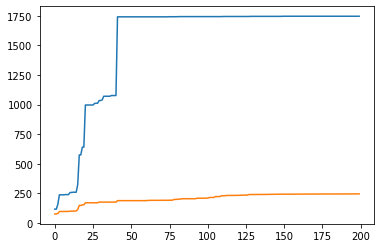

In [11]:
plt.plot(load_logs('build/logs/DNN_0207_235544'))

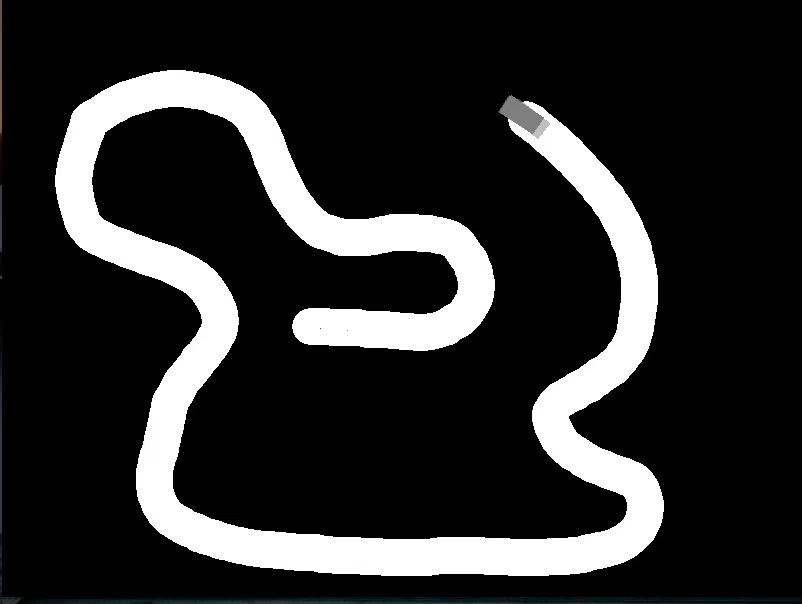

In [8]:
Image('video1.gif')

Można też zauważyć, że nauczony w ten sposób pojazd zupełnie nie radzi sobie na innych torach

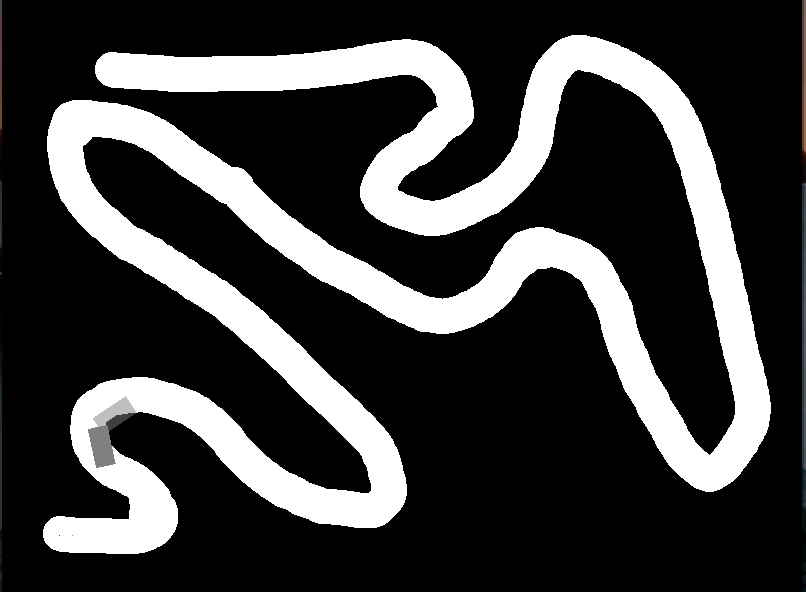

In [14]:
Image('video2.gif')

W przypadku powyższej, trochę trudniejszej mapy nawet pojazdy uczone od początku na niej nie mogły sobie z nią poradzić.

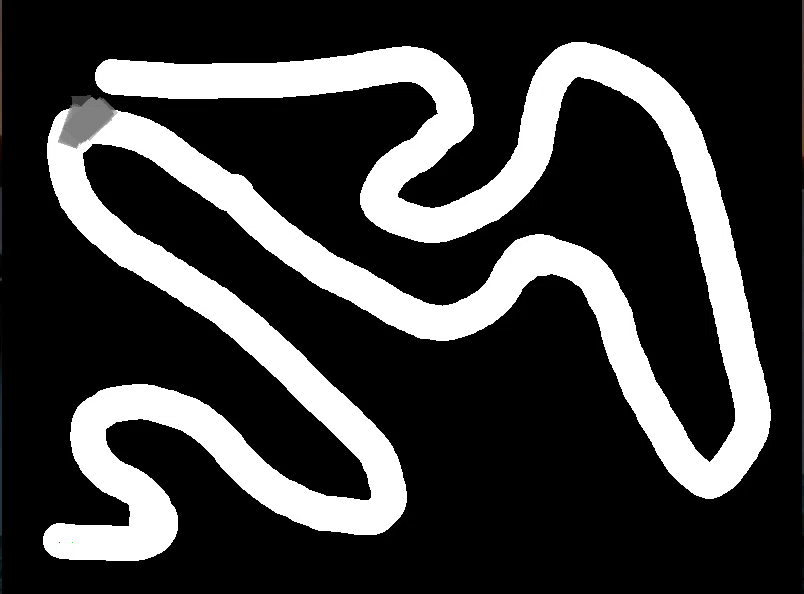

In [15]:
Image('video3.gif')

Rozwiązaniem okazało się być uczenie pojazdów na kilku mapach jednocześnie - znacząco poprawiało to wyniki na mapach biorących udział w uczeniu, ale też na nowych mapach. Poniższy wykres pokazuje postępy uczenia (najlepsze uzyskane rezultaty) dla każdego z kryteriów.

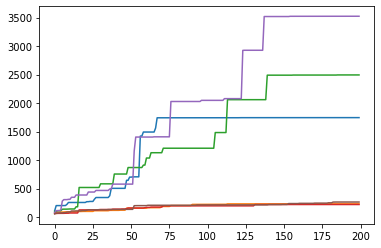

In [17]:
plt.plot(load_logs('build/logs/DNN_20_0207_230023'))

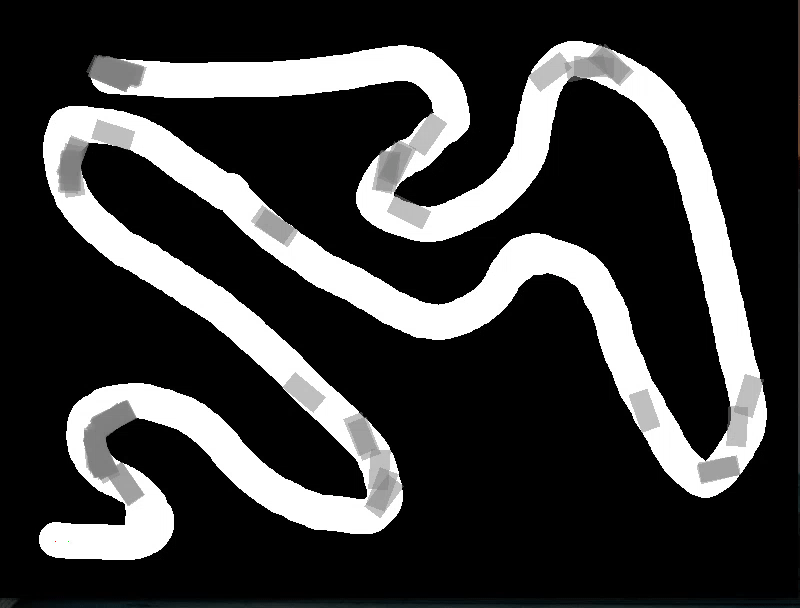

In [18]:
Image('video4.gif')

Tak nauczona populacja radzi potrafi też w pewnym stopniu generalizować, poniżej pokazano, jak radzi sobie na mapie, na której nie była uczona:

In [19]:
Image('video5.gif')